In [1]:
import pandas as pd

In [1]:
import time
import multiprocessing as mp
from multiprocessing import Pool
from collections import defaultdict
import sys
sys.path.append('/home/ak/Documents/PaperCode/stylised_facts')
sys.path.append('/home/ak/Documents/Research/PaperCode/stylised_facts/lob_for_futures')
import numpy as np
import matplotlib.pyplot as plt

import os
import stylised_facts.lob_for_futures as lobFut
# from lob_for_futures import *

from scipy.stats import jarque_bera
import matplotlib.pyplot as plt

from dateutil.parser import parse
from pandas.tseries.offsets import BDay
import pickle as pkl
import fnmatch
import pickle
import datetime as dt
from datetime import timedelta
import glob
import fathon
from fathon import fathonUtils as fu
import itertools
import pyinform as pyinf
# import pingouin as pig
import seaborn as sns
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
from scipy.special import kl_div
import time
import pickle as pkl
import matplotlib.ticker as mtick
from functools import partial
import fathon
from fathon import fathonUtils as fu
from itertools import repeat
from multiprocessing import Pool, freeze_support

ModuleNotFoundError: No module named 'stylised_facts'

In [21]:
elements = '/media/ak/Elements/OrderBookProcessedData'
t7 = '/media/ak/T7'
june_4_exp = os.path.join(t7, 'June4th2022Experiments')
workDrive = '/media/ak/WorkDrive/'
stylisedFactsExperiments = os.path.join(workDrive, 'StylisedFactsExperiments')
workDriveData = os.path.join(workDrive, 'Data')
os_data = '/media/ak/OS/Data'
FuturesDataSemiProcessed = os.path.join(t7, 'FuturesDataSemiProcessed')
experimentsLocation = '/media/ak/T7/June4th2022Experiments'
bars =['volume_bar', 'calendar_bar', 'usd_volume_bar', 'tick_bar']
# plt.style.use(os.path.join('/home/ak/.config/matplotlib','l3.mplstyle'))
figures_destination = '/home/ak/Documents/Research/Papers/figures/'


In [24]:
symbols = os.listdir(FuturesDataSemiProcessed)

In [25]:
FB1_path = os.path.join(FuturesDataSemiProcessed, 'FB1')
FB1_files = sorted(os.listdir(FB1_path))

In [27]:
file_idx =1
file_loc = os.path.join(FB1_path, FB1_files[file_idx])

In [33]:
bars_dict =pd.read_pickle(file_loc)[FB1_files[file_idx].split(".")[0]]

In [37]:
tick = bars_dict['tick']
volume = bars_dict['volume']
dollar = bars_dict['dollar']


In [36]:
tick.columns.values

array(['BidSize_open', 'BidSize_high', 'BidSize_low', 'BidSize_close',
       'QuoteTime_open', 'QuoteTime_high', 'QuoteTime_low',
       'QuoteTime_close', 'type_x_open', 'type_x_high', 'type_x_low',
       'type_x_close', 'BestBid_open', 'BestBid_high', 'BestBid_low',
       'BestBid_close', 'TradeTime_open', 'TradeTime_high',
       'TradeTime_low', 'TradeTime_close', 'AskSize_open', 'AskSize_high',
       'AskSize_low', 'AskSize_close', 'time_y_open', 'time_y_high',
       'time_y_low', 'time_y_close', 'type_y_open', 'type_y_high',
       'type_y_low', 'type_y_close', 'BestAsk_open', 'BestAsk_high',
       'BestAsk_low', 'BestAsk_close', 'TradeSize_open', 'TradeSize_high',
       'TradeSize_low', 'TradeSize_close', 'type_open', 'type_high',
       'type_low', 'type_close', 'TradePrice_open', 'TradePrice_high',
       'TradePrice_low', 'TradePrice_close', 'TimeStamp_open',
       'TimeStamp_high', 'TimeStamp_low', 'TimeStamp_close',
       'TradeVolume_open', 'TradeVolume_high', 'Tr

In [44]:
tick_vol_df = lobFut.volatilityEstimation(tick)

In [47]:
tick_micro_features = lobFut.apply_micro_structure_features(tick)

Applying micro-structure features


In [48]:
tick_micro_features.columns

Index(['tick_bucket', 'BidSize_open', 'BidSize_high', 'BidSize_low', 'BidSize_close', 'QuoteTime_open', 'QuoteTime_high', 'QuoteTime_low', 'QuoteTime_close', 'type_x_open', 'type_x_high', 'type_x_low', 'type_x_close', 'BestBid_open', 'BestBid_high', 'BestBid_low', 'BestBid_close', 'TradeTime_open', 'TradeTime_high', 'TradeTime_low', 'TradeTime_close', 'AskSize_open', 'AskSize_high', 'AskSize_low', 'AskSize_close', 'time_y_open', 'time_y_high', 'time_y_low', 'time_y_close', 'type_y_open', 'type_y_high', 'type_y_low', 'type_y_close', 'BestAsk_open', 'BestAsk_high', 'BestAsk_low', 'BestAsk_close', 'TradeSize_open', 'TradeSize_high', 'TradeSize_low', 'TradeSize_close', 'type_open', 'type_high', 'type_low', 'type_close', 'TradePrice_open', 'TradePrice_high', 'TradePrice_low', 'TradePrice_close', 'TimeStamp_open', 'TimeStamp_high', 'TimeStamp_low', 'TimeStamp_close', 'TradeVolume_open', 'TradeVolume_high', 'TradeVolume_low', 'TradeVolume_close', 'total_traded_volume_open',
       'total_trad

In [51]:
pct_micro_change = tick_micro_features.pct_change_micro_price
weighted_activity_spread = tick_micro_features.weighted_activity_spread


In [53]:
data = weighted_activity_spread
b_raw = np.asanyarray(data)
b = fu.toAggregated(b_raw)
pydfb = fathon.DFA(b)

In [57]:
%%time
winSizes = fu.linRangeByStep(10, 40)
revSeg = True
polOrd = 3
n, F = pydfb.computeFlucVec(winSizes, revSeg=revSeg, polOrd=polOrd)

CPU times: user 1.08 s, sys: 0 ns, total: 1.08 s
Wall time: 111 ms


In [58]:
H, H_intercept = pydfb.fitFlucVec()

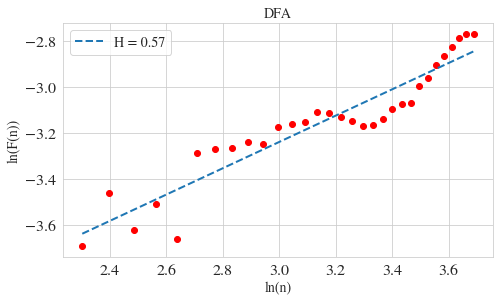

In [59]:
plt.plot(np.log(n), np.log(F), 'ro')
plt.plot(np.log(n), H_intercept+H*np.log(n), '--', label='H = {:.2f}'.format(H))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('DFA', fontsize=14)
plt.legend(loc=0, fontsize=14)

In [60]:
## MFDFA

In [61]:
pymfdfb = fathon.MFDFA(b)

In [64]:
winSizes = fu.linRangeByStep(10, 40)
qs = np.arange(-3, 4, 0.1)
revSeg = True
polOrd = 1

In [65]:
%%time
n, F = pymfdfb.computeFlucVec(winSizes, qs, revSeg=revSeg, polOrd=polOrd)

CPU times: user 1.17 s, sys: 0 ns, total: 1.17 s
Wall time: 110 ms


In [66]:
list_H, list_H_intercept = pymfdfb.fitFlucVec()

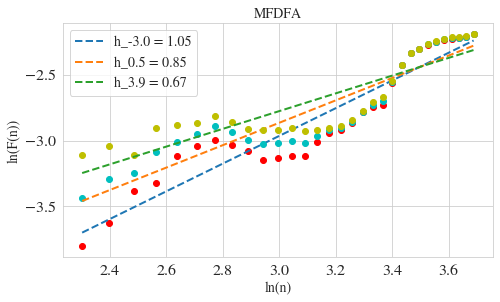

In [67]:
plt.plot(np.log(n), np.log(F[0, :]), 'ro')
plt.plot(np.log(n), list_H_intercept[0]+list_H[0]*np.log(n), '--', label='h_{:.1f} = {:.2f}'.format(qs[0], list_H[0]))
half_idx = int(len(qs)/2)
plt.plot(np.log(n), np.log(F[half_idx, :]), 'co')
plt.plot(np.log(n), list_H_intercept[half_idx]+list_H[half_idx]*np.log(n),
         '--', label='h_{:.1f} = {:.2f}'.format(qs[half_idx], list_H[half_idx]))
plt.plot(np.log(n), np.log(F[-1, :]), 'yo')
plt.plot(np.log(n), list_H_intercept[-1]+list_H[-1]*np.log(n), '--',
         label='h_{:.1f} = {:.2f}'.format(qs[-1], list_H[-1]))
plt.xlabel('ln(n)', fontsize=14)
plt.ylabel('ln(F(n))', fontsize=14)
plt.title('MFDFA', fontsize=14)
plt.legend(loc=0, fontsize=14)

Text(0.5, 1.0, 'h(q)')

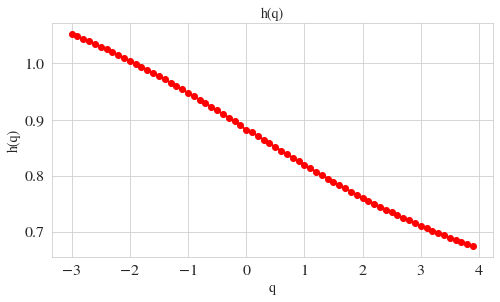

In [68]:
plt.plot(qs, list_H, 'ro-')
plt.xlabel('q', fontsize=14)
plt.ylabel('h(q)', fontsize=14)
plt.title('h(q)', fontsize=14)

Text(0.5, 1.0, '$\\tau$(q)')

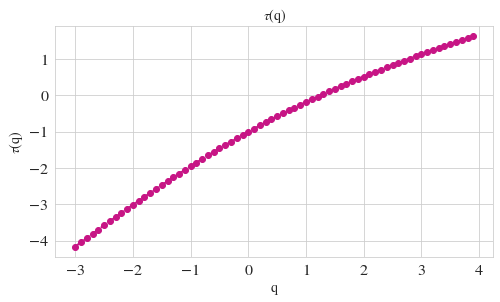

In [70]:
tau = pymfdfb.computeMassExponents()
plt.plot(qs, tau, 'o--', color='mediumvioletred')
plt.xlabel('q', fontsize=14)
plt.ylabel('$\\tau$(q)', fontsize=14)
plt.title('$\\tau$(q)', fontsize=14)

In [71]:
alpha, mfSpect = pymfdfb.computeMultifractalSpectrum()

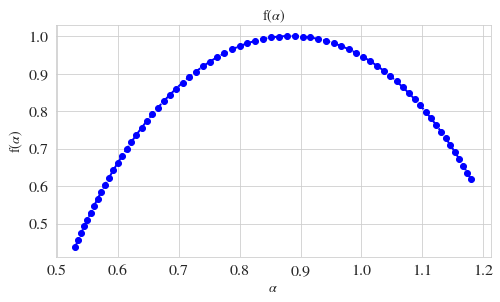

In [72]:
_=plt.plot(alpha, mfSpect, 'bo--')
_=plt.xlabel('$\\alpha$', fontsize=14)
_=plt.ylabel('f($\\alpha$)', fontsize=14)
_=plt.title('f($\\alpha$)', fontsize=14)

In [82]:
!pip install statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 5.5 MB/s eta 0:00:01
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [84]:
!pip uninstall statsmodels

Found existing installation: statsmodels 0.12.2
Uninstalling statsmodels-0.12.2:
  Would remove:
    /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/statsmodels-0.12.2.dist-info/*
    /home/ak/anaconda3/envs/ds3_kernels/lib/python3.6/site-packages/statsmodels/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [75]:
res = STL(data, period=2).fit()

ValueError: negative dimensions are not allowed